# Lead Scoring Case Study

In [91]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [92]:
#import dataset to csv

leadsDataframe=pd.read_csv("Leads.csv")


In [93]:
leadsDataframe.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [94]:
leadsDataframe.shape

(9240, 37)

In [95]:
leadsDataframe.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [96]:
leadsDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In the given data, categorical values are present that need to be converted into dummy variables. Additionally, there are null values that require appropriate handling in subsequent stages.

In [97]:
#check for duplicates
sum(leadsDataframe.duplicated(subset = 'Prospect ID')) == 0

True

In [98]:
#check for duplicates
sum(leadsDataframe.duplicated(subset = 'Lead Number')) == 0

True

There are no duplicate values in 'Prospect ID' & 'Lead Number'

## Exploratory Data Analysis

#### Data Cleaning Process

In [99]:
#dropping Lead Number and Prospect ID since they have all unique values

leadsDataframe.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

It is apparent that some columns contain the level 'Select', indicating that the customer did not choose an option for that specific column. Consequently, these values are equivalent to missing values, and we will transform 'Select' values into NaN.

In [100]:
#Replacing 'Select' values with Nan
leadsDataframe=leadsDataframe.replace("Select", np.nan)

In [101]:
#Checking for count of missing values in each column
leadsDataframe.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [102]:
#checking percentage of null values in each column
round(100*(leadsDataframe.isnull().sum()/len(leadsDataframe.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

As we can see in the above data there are many columns with high percentage of null values, So we will drop them as they are not useful

#### Dropping Columns with Missing Values >=35%

In [103]:
#Drop all the columns with more than 45% missing values
missingColumns=leadsDataframe.columns

for i in missingColumns:
    if((100*(leadsDataframe[i].isnull().sum()/len(leadsDataframe.index))) >= 35):
        leadsDataframe.drop(i, 1, inplace = True)

In [104]:
#checking percentage of null values in each column after dropping columns with more than 45% missing values
round(100*(leadsDataframe.isnull().sum()/len(leadsDataframe.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [105]:
def funcountplot(data = 'Search', xAxis = 0, yAxis = 0, axs = []):
    sns.countplot(x = data, hue = "Converted", data = leadsDataframe, ax = axs[xAxis,yAxis],palette = 'hls')

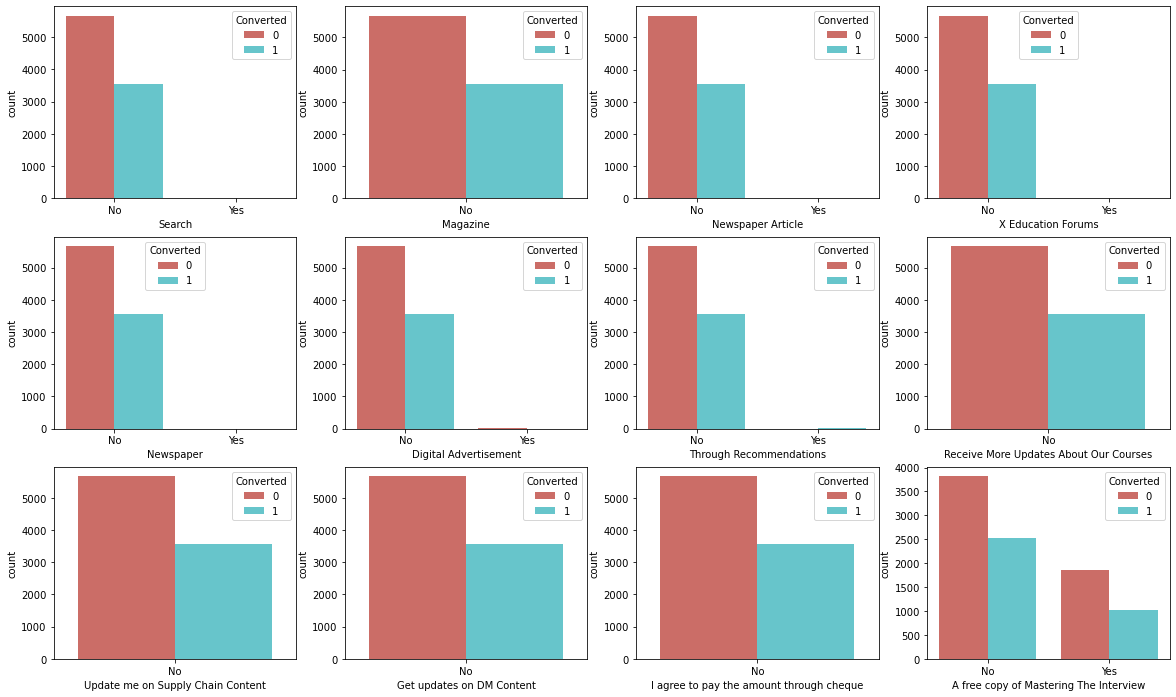

In [106]:
fig, dt = plt.subplots(3,4,figsize = (20,12))
funcountplot(data = "Search", xAxis=0, yAxis=0, axs = dt)
funcountplot(data = "Magazine", xAxis=0, yAxis=1, axs = dt)
funcountplot(data = "Newspaper Article", xAxis=0, yAxis=2, axs = dt)
funcountplot(data = "X Education Forums", xAxis=0, yAxis=3, axs = dt)
funcountplot(data = "Newspaper", xAxis=1, yAxis=0, axs = dt)
funcountplot(data = "Digital Advertisement", xAxis=1, yAxis=1, axs = dt)
funcountplot(data = "Through Recommendations", xAxis=1, yAxis=2, axs = dt)
funcountplot(data = "Receive More Updates About Our Courses", xAxis=1, yAxis=3, axs = dt)
funcountplot(data = "Update me on Supply Chain Content", xAxis=2, yAxis=0, axs = dt)
funcountplot(data = "Get updates on DM Content", xAxis=2, yAxis=1, axs = dt)
funcountplot(data = "I agree to pay the amount through cheque", xAxis=2, yAxis=2, axs = dt)
funcountplot(data = "A free copy of Mastering The Interview", xAxis=2, yAxis=3, axs = dt)
plt.show()

#### Inference

1. For all these columns  except 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them
2. A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns

In [107]:
#list of columns to be dropped

columnsToDrop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [108]:
#checking value counts of Lead Source column
leadsDataframe['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Google is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [109]:
#replacing Nan Value with Google
leadsDataframe['Lead Source'] = leadsDataframe['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leadsDataframe['Lead Source'] = leadsDataframe['Lead Source'].replace('google','Google')


In [110]:
#combining low frequency values to Others

leadsDataframe['Lead Source'] = leadsDataframe['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

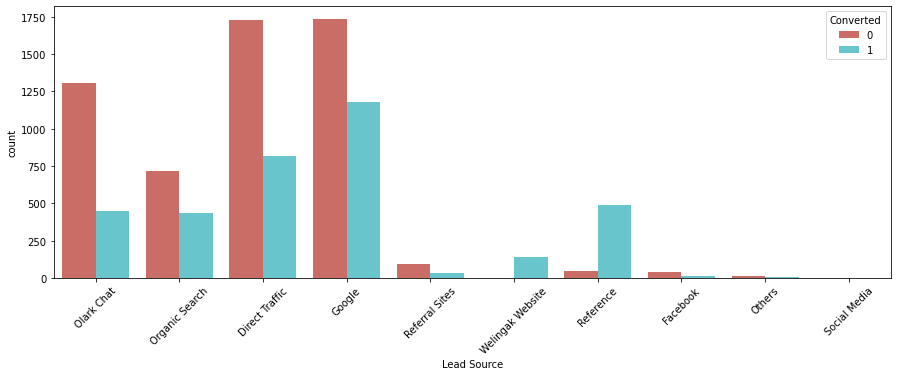

In [111]:
#visualizing count of Lead Source Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leadsDataframe , palette = 'hls')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

####  Inference 

1. Maximum Leads are generated by Google and Direct Traffic.
2. Conversion rate of Reference leads and Welinkgak Website leads is very high.

In [112]:
#checking value counts of Country column

leadsDataframe['Country'].value_counts(dropna=False)


India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Since, missing values are very high , we can impute all missing values with  value 'not provided'

In [113]:
#Imputing missing values in Country column with "'not provided"
leadsDataframe['Country'] = leadsDataframe['Country'].replace(np.nan,'not provided')

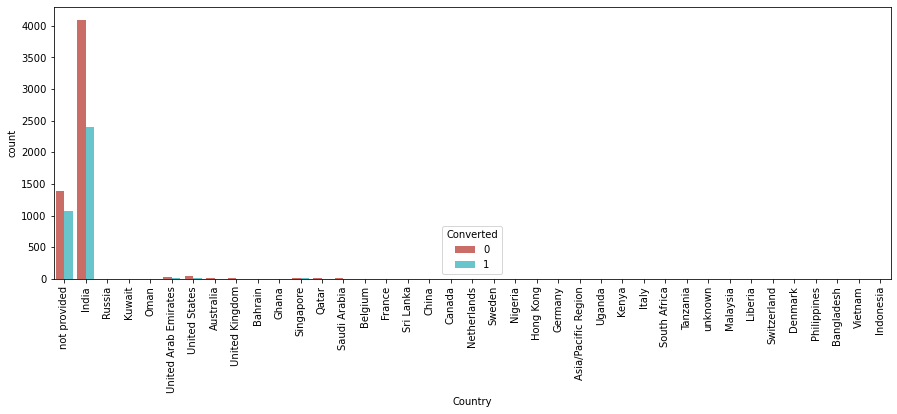

In [114]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =leadsDataframe , palette = 'hls')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference

As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column

In [115]:
#creating a list of columns to be droppped

columnsToDrop.append('Country')

#checking out list of columns to be dropped
columnsToDrop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [116]:
#checking value counts of 'What is your current occupation' column
leadsDataframe['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Since no information has been provided regarding occupation, we can replace missing values with new category 'Not provided' 


In [117]:
#Creating new category 'Not provided'

leadsDataframe['What is your current occupation'] = leadsDataframe['What is your current occupation'].replace(np.nan, 'Not provided')

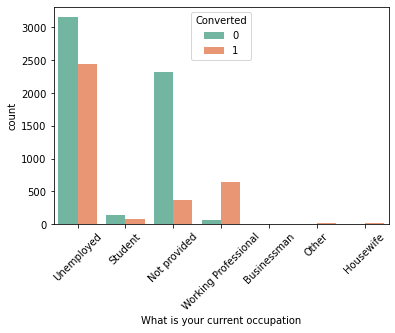

In [118]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x='What is your current occupation', hue='Converted' , data = leadsDataframe , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()


#### Inference

1. Maximum leads generated are unemployed and their conversion rate is more than 50%.
2. Conversion rate of working professionals is very high.

In [119]:
#checking value counts of 'What matters most to you in choosing a course'

leadsDataframe['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

It is evident that the absence of values in this particular column can be filled by using 'Better Career Prospects' as an imputation technique.

In [120]:
leadsDataframe['What matters most to you in choosing a course'] = leadsDataframe['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

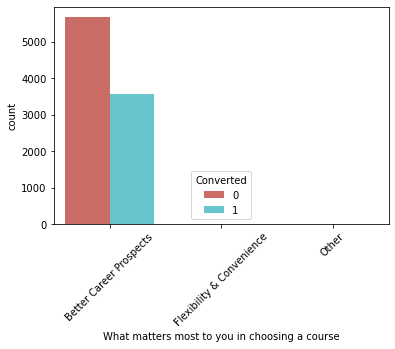

In [121]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data = leadsDataframe , palette = 'hls')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

#### Inference

This column spread of variance is very low , hence it can be dropped.

In [122]:
# Append 'What matters most to you in choosing a course'to the columnsToDrop List
columnsToDrop.append('What matters most to you in choosing a course')

#checking updated list for columns to be dropped
columnsToDrop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [123]:
#checking value counts of Last Activity
leadsDataframe['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Missing values can be imputed with mode value "Email Opened"

In [124]:
  #replacing Nan Values with mode value "Email Opened"

leadsDataframe['Last Activity'] = leadsDataframe['Last Activity'].replace(np.nan,'Email Opened')


In [125]:
#combining low frequency values
leadsDataframe['Last Activity'] = leadsDataframe['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

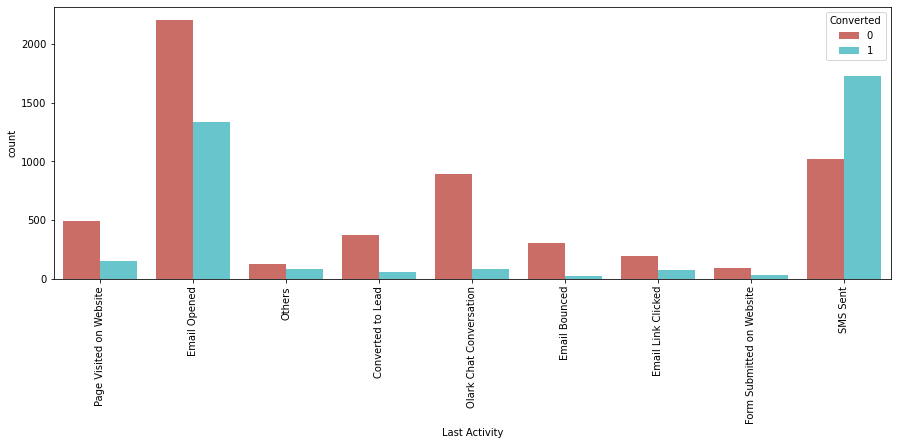

In [126]:
#visualizing count of Last Activity Variable 

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted' , data = leadsDataframe , palette = 'hls')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Inference

1. Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
2. SMS sent as last acitivity has high conversion rate.

In [127]:
# Append 'Last Activity' to the columnsToDrop List it is a X-education's sales team generated data
columnsToDrop.append('Last Activity')

#checking updated list for columns to be dropped
columnsToDrop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [128]:
#Check the Null Values in All Columns after imputation:
round(100*(leadsDataframe.isnull().sum()/len(leadsDataframe.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [129]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
leadsDataframe = leadsDataframe.dropna()

In [130]:
leadsDataframe.shape

(9103, 25)

In [131]:
#Checking percentage of Null Values in All Columns:
round(100*(leadsDataframe.isnull().sum()/len(leadsDataframe.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

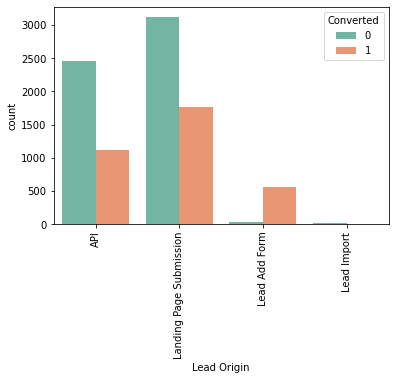

In [132]:
s1=sns.countplot(x='Lead Origin', hue='Converted' , data = leadsDataframe , palette = 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

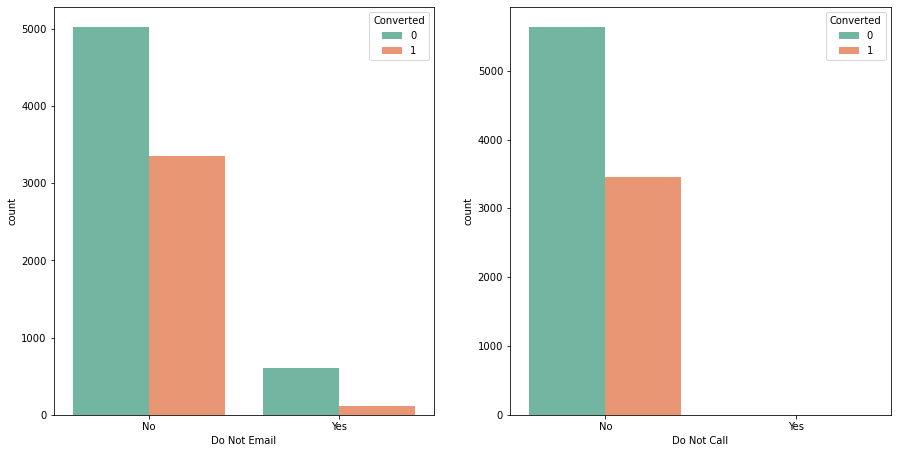

In [133]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leadsDataframe, ax = axs[0],palette = 'Set2')
sns.countplot(x = "Do Not Call", hue = "Converted", data = leadsDataframe, ax = axs[1],palette = 'Set2')
plt.show()

In [134]:
# Append 'Do Not Call' to the columnsToDrop List
columnsToDrop.append('Do Not Call')

#checking updated list for columns to be dropped
columnsToDrop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

In [135]:
#checking value counts of last Notable Activity
leadsDataframe['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [136]:
#clubbing lower frequency values

leadsDataframe['Last Notable Activity'] = leadsDataframe['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

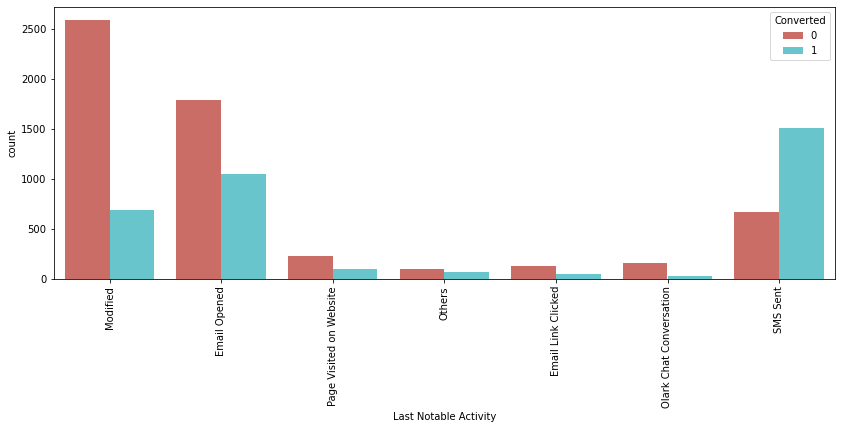

In [137]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leadsDataframe , palette = 'hls')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

#### Inference

1. Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
2. SMS sent as last acitivity has high conversion rate.

In [ ]:
# Append 'Last Notable Activity'to the columnsToDrop List as this is a sales team generated data
columnsToDrop.append('Last Notable Activity')